# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [2]:
con_rev = pd.read_csv('Reviews.csv')
con_rev.shape
con_rev.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
filtered_data = con_rev[con_rev['Score']!=3]
print(filtered_data.shape)
filtered_data.head()

(525814, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
def partition(x):
    if x < 3:
        return 0
    return 1

In [5]:
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(3)

Number of data points in our data (525814, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


# Exploratory Data Analysis

Data Cleaning: Deduplication

In [6]:
subset = {"UserId", "ProfileName", "Time", "Text"}
data = filtered_data.drop_duplicates(subset=subset, keep="first")
print(data.shape)
data.head(3)

(364173, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [7]:
#Checking to see how much % of data still remains
(data['Id'].size)/(filtered_data['Id'].size)*100

69.25890143662969

In [8]:
#Checking IS 'HelpfulnessNumerator' always less than or equal to 'HelpfulnessDenominator' ?
data[data['HelpfulnessNumerator'] > data['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,1,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,1,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [9]:
data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]
data.reset_index(drop = True, inplace=True)
print(data.shape)
data.head(3)

(364171, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


Identifing missing Values

In [10]:

miss_val = data.isna().sum()
miss_val

Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    1
Text                       0
dtype: int64

In [11]:
print(data['Score'].value_counts())


1    307061
0     57110
Name: Score, dtype: int64


Text(0.5, 1.0, 'Score distribution')

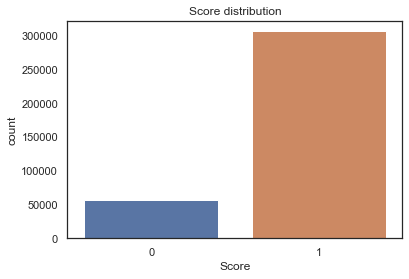

In [12]:
sns.countplot('Score',data = data)
plt.title("Score distribution")

# Text Preprocessing: Stemming, stop-word removal and Lemmatization.

In [13]:
import re
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

#initialising the snowball stemmer
sno = nltk.stem.SnowballStemmer('english')                      


#function to clean the word of any html-tags
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext



#function to clean the word of any punctuation or special characters
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


#function to text summarization
def final_sentence(text):
    
    text = text.split()
    text = [cleanhtml(x) for x in text]
    text = [cleanpunc(x) for x in text]
    
    def test(word):
        if word.isalpha() and len(word) > 2 and word.lower() not in stop:
            return True
        else:
            return False
    
    text = [x for x in text if test(x)]
    
    return ' '.join(text)

In [14]:
data['CleanedText'] = data['Text'].apply(final_sentence)
print(data.shape)
data.head()

(364171, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several Vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted peanuts a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around pillowy citrus gelatin nuts ...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient Robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy great wide assortment yummy Delive...


In [15]:
def Text_Into_Vector(model,data):
    model_vect = model(ngram_range=(1,2)) #in scikit-learn
    final_array = model_vect.fit_transform(data.values)

    print("the type of count vectorizer ",type(final_array))
    print("the shape of out text BOW vectorizer ",final_array.get_shape())
    print("the number of unique words including both unigrams and bigrams ", final_array.get_shape()[1])
    
    return model_vect, final_array

In [16]:
from sklearn.model_selection import train_test_split

def Split_data(x_vec, y_vec):
    X_train, X_test, Y_train, Y_test = train_test_split(x_vec, y_vec, test_size=.33, random_state=0)
    X_tr, X_cv, Y_tr, Y_cv = train_test_split(X_train, Y_train, test_size=.33, random_state=0)
    return X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train


In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

def Normalization(train, cv, test):
    train=preprocessing.normalize(train)
    cv=preprocessing.normalize(cv)
    test=preprocessing.normalize(test)

    print("Train Data Size ",train.get_shape())
    print("CV Data Size: ",cv.shape)
    print("Test Data Size: ",test.shape)
    
    return train, cv, test

# Training Multinomial Naive Bayes Model

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pylab as pyplt

def Multinomial_NB(X_train,X_cv,Y_train,Y_cv):
    #############################################################################
    best_alpha=0
    max_roc_auc=-1
    pred_cv = []
    pred_train = []
    alpha=[10000,5000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
    #############################################################################

    for i in alpha:
        mulbnb = MultinomialNB(alpha=i)
        mulbnb.fit(X_train,Y_train)
        probs = mulbnb.predict_proba(X_cv)[:,1]     
        prob = mulbnb.predict_proba(X_train)[:,1]
        #############################################################################

        auc_score_cv = roc_auc_score(Y_cv,probs)            #auc roc for cv
        auc_score_train = roc_auc_score(Y_train,prob)       #auc roc for train
        #############################################################################

        print(i," ------> ",auc_score_cv)
        #############################################################################

        pred_cv.append(auc_score_cv)
        pred_train.append(auc_score_train)
        #############################################################################

        if(max_roc_auc<auc_score_cv):
            max_roc_auc=auc_score_cv
            best_alpha=i
    print("*"*100)
    print(f"\n Best alpha Value {best_alpha} with highest roc_auc Score is {max_roc_auc}")
    print("*"*100)
    #############################################################################

    sns.set_style("darkgrid")
    plt.xscale('log')
    plt.plot(alpha, pred_cv,'r-', label = 'CV Data')
    plt.plot(alpha,pred_train,'g-', label ='Train Data')
    plt.legend(loc='upper right')
    plt.title(r'Auc Score v/s $\alpha$')
    plt.xlabel(r"alpha values",fontsize=12)
    plt.ylabel("roc_auc",fontsize=12)
    plt.show()
    print("*"*100)
    #############################################################################

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_cv,probs)
    # plot no skill
    pyplt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplt.plot(fpr, tpr, marker='.')
    pyplt.title("Line Plot of ROC Curve on Train Data")
    pyplt.ylabel('True Positive Rate')
    pyplt.xlabel('False Positive Rate')
    pyplt.show()
    print("*"*100)
    
    #############################################################################
    return best_alpha


# Testing Multinomial Naive Bayes Model

In [19]:
import scikitplot.metrics as skplt
from sklearn import metrics
from sklearn.metrics import confusion_matrix


def Testing_model(X_train,Y_train,X_test,Y_test,best_alpha):
    
    #############################################################################
    bnb = MultinomialNB(alpha = best_alpha, fit_prior=True, class_prior=None)
    bnb.fit(X_train,Y_train)
    probs = bnb.predict_proba(X_test)[:,1]            # keep probabilities for the positive outcome only

    #############################################################################
    roc_auc = roc_auc_score(Y_test,probs)
    print("AUC Score",roc_auc)
    print("*"*70)
    #############################################################################'

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_test,probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("Line Plot of ROC Curve on Test Data")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')    
    plt.show()

    #############################################################################
    prediction=bnb.predict(X_test)
    skplt.plot_confusion_matrix(Y_test,prediction)
    #############################################################################

    print("macro f1 score for data :",metrics.f1_score(Y_test, prediction, average = 'macro'))
    print("micro f1 score for data:",metrics.f1_score(Y_test, prediction, average = 'micro'))
    print("hamming loss for data:",metrics.hamming_loss(Y_test,prediction))
    print("*"*70)
    print("Precision recall report for data:\n",metrics.classification_report(Y_test, prediction))
    print("*"*70)
    
    return bnb,roc_auc

    #############################################################################

# Top features

In [20]:
def Important_features(model, classifier):
    neg = classifier.feature_log_prob_[0].argsort()
    pos = classifier.feature_log_prob_[1].argsort()
    top_pos_words = np.take(model.get_feature_names(),pos)
    top_neg_words = np.take(model.get_feature_names(),neg)
    imp_df = pd.DataFrame(columns = ['Pos_Words','Pos_Importance','Neg_Words','Neg_Importance'])
    imp_df['Pos_Words'] = top_pos_words[::-1]
    imp_df['Pos_Importance'] = np.take(classifier.feature_log_prob_[1],pos)[::-1]
    imp_df['Neg_Words'] = top_neg_words[::-1]
    imp_df['Neg_Importance'] = np.take(classifier.feature_log_prob_[0],neg)[::-1]
    return imp_df

# Individual Prediction

In [21]:
def Individual_Prediction(model, classifier, review):
    review = final_sentence(review)
    review_vec = model.transform([review])
    review_vec = preprocessing.normalize(review_vec)
    pred = classifier.predict(review_vec)

    return "positive review" if pred[0] == 1 else "negative review"

# Bag of Words (BoW)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

BOW, X = Text_Into_Vector(CountVectorizer,data['CleanedText'])

the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text BOW vectorizer  (364171, 3474709)
the number of unique words including both unigrams and bigrams  3474709


In [23]:
BOW.get_feature_names()[:20]

['aaa',
 'aaa aaa',
 'aaa able',
 'aaa class',
 'aaa cola',
 'aaa condition',
 'aaa dont',
 'aaa hockey',
 'aaa job',
 'aaa magazine',
 'aaa plus',
 'aaa rating',
 'aaa tue',
 'aaaa',
 'aaaaaaaaagghh',
 'aaaaaaarrrrrggghhh',
 'aaaaaaarrrrrggghhh dark',
 'aaaaaah',
 'aaaaaah melt',
 'aaaaaahhh']

In [24]:
BOW.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [25]:
X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train = Split_data(X, data['Score'])

In [26]:
print('X_test, Y_test', X_test.shape, Y_test.shape)
print('X_tr, Y_tr', X_tr.shape, Y_tr.shape)
print('X_cv, Y_cv', X_cv.shape, Y_cv.shape)
print('X_Train, Y_Train', X_train.shape, Y_train.shape)

X_test, Y_test (120177, 3474709) (120177,)
X_tr, Y_tr (163475, 3474709) (163475,)
X_cv, Y_cv (80519, 3474709) (80519,)
X_Train, Y_Train (243994, 3474709) (243994,)


In [28]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X_tr, Y_tr = smote.fit_resample (X_tr, Y_tr)
X_cv, Y_cv = smote.fit_resample (X_cv, Y_cv)
print("After SMOTE: ", Counter( Y_tr))
print("After SMOTE: ", Counter( Y_cv))

After SMOTE:  Counter({1: 137691, 0: 137691})
After SMOTE:  Counter({1: 68027, 0: 68027})


In [29]:
X_tr, X_cv, X_test = Normalization(X_tr, X_cv, X_test)

Train Data Size  (275382, 3474709)
CV Data Size:  (136054, 3474709)
Test Data Size:  (120177, 3474709)


# Navie Bayes for BOW

10000  ------>  0.8690669082532695
5000  ------>  0.880095301570752
1000  ------>  0.9064995399764364
500  ------>  0.9173480165087966
100  ------>  0.9384509850458789
50  ------>  0.9452651190278238
10  ------>  0.956327921649794
5  ------>  0.9599552347687204
1  ------>  0.9685767755164001
0.5  ------>  0.9725465651008874
0.1  ------>  0.9678580939685115
0.05  ------>  0.9544010846580331
0.01  ------>  0.9413819678085537
0.005  ------>  0.9450878268881143
0.001  ------>  0.9535976976819616
0.0005  ------>  0.9556366046126248
0.0001  ------>  0.9573963241254089
5e-05  ------>  0.9573601540006396
1e-05  ------>  0.9565101568789006
****************************************************************************************************

 Best alpha Value 0.5 with highest roc_auc Score is 0.9725465651008874
****************************************************************************************************


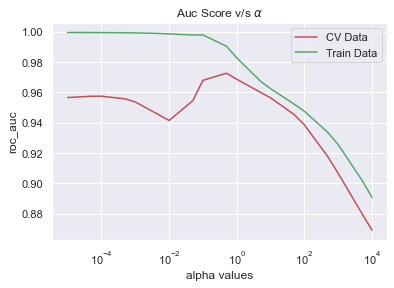

****************************************************************************************************


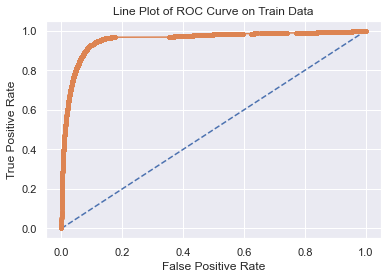

****************************************************************************************************


In [30]:
best_alpha_bow = Multinomial_NB(X_tr,X_cv,Y_tr,Y_cv)

AUC Score 0.8831483877168367
**********************************************************************


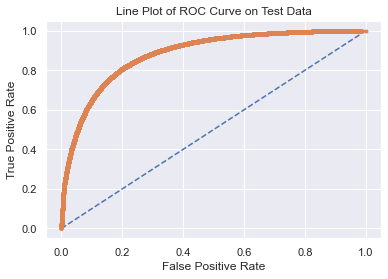

macro f1 score for data : 0.5565616371387248
micro f1 score for data: 0.8586751208633931
hamming loss for data: 0.14132487913660685
**********************************************************************
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.93      0.11      0.19     18834
           1       0.86      1.00      0.92    101343

    accuracy                           0.86    120177
   macro avg       0.89      0.55      0.56    120177
weighted avg       0.87      0.86      0.81    120177

**********************************************************************


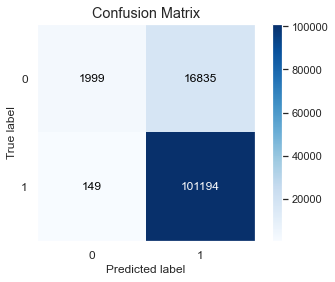

In [31]:
# Testing NB Model

NB_bow, roc_auc_bow = Testing_model(X_tr,Y_tr,X_test,Y_test,best_alpha_bow)

In [32]:
# Top features using NB and BOW

Important_features(BOW, NB_bow)

,Pos_Words,Pos_Importance,Neg_Words,Neg_Importance
0,like,-6.079890,like,-5.248583
1,great,-6.159482,would,-5.924236
2,good,-6.272249,taste,-6.187885
3,love,-6.380448,coffee,-6.291088
4,one,-6.531523,product,-6.356631
...,...,...,...,...
3474704,home jalapeno,-15.487618,phony chemically,-15.230117
3474705,home jam,-15.487618,phony cappuccinos,-15.230117
3474706,together actually,-15.487618,phony butter,-15.230117
3474707,home jammies,-15.487618,phony baloney,-15.230117


# TF-IDF

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

TfIdf, X = Text_Into_Vector(TfidfVectorizer,data['CleanedText'])

the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text BOW vectorizer  (364171, 3474709)
the number of unique words including both unigrams and bigrams  3474709


In [34]:
TfIdf.get_feature_names()[:20]

['aaa',
 'aaa aaa',
 'aaa able',
 'aaa class',
 'aaa cola',
 'aaa condition',
 'aaa dont',
 'aaa hockey',
 'aaa job',
 'aaa magazine',
 'aaa plus',
 'aaa rating',
 'aaa tue',
 'aaaa',
 'aaaaaaaaagghh',
 'aaaaaaarrrrrggghhh',
 'aaaaaaarrrrrggghhh dark',
 'aaaaaah',
 'aaaaaah melt',
 'aaaaaahhh']

In [35]:
TfIdf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [36]:
X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train = Split_data(X, data['Score'])

In [37]:
print('X_test, Y_test', X_test.shape, Y_test.shape)
print('X_tr, Y_tr', X_tr.shape, Y_tr.shape)
print('X_cv, Y_cv', X_cv.shape, Y_cv.shape)
print('X_Train, Y_Train', X_train.shape, Y_train.shape)

X_test, Y_test (120177, 3474709) (120177,)
X_tr, Y_tr (163475, 3474709) (163475,)
X_cv, Y_cv (80519, 3474709) (80519,)
X_Train, Y_Train (243994, 3474709) (243994,)


In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X_tr, Y_tr = smote.fit_resample (X_tr, Y_tr)
X_cv, Y_cv = smote.fit_resample (X_cv, Y_cv)
print("After SMOTE: ", Counter( Y_tr))
print("After SMOTE: ", Counter( Y_cv))

After SMOTE:  Counter({1: 137691, 0: 137691})
After SMOTE:  Counter({1: 68027, 0: 68027})


In [39]:
X_tr, X_cv, X_test = Normalization(X_tr, X_cv, X_test)

Train Data Size  (275382, 3474709)
CV Data Size:  (136054, 3474709)
Test Data Size:  (120177, 3474709)


# Naive bayes for TF-idf

10000  ------>  0.9174326270728814
5000  ------>  0.9203573241706653
1000  ------>  0.9318599387930053
500  ------>  0.9376907320621376
100  ------>  0.9495222156622822
50  ------>  0.9534023668854825
10  ------>  0.9593878037610037
5  ------>  0.960622615584275
1  ------>  0.959289723359346
0.5  ------>  0.9558552084463967
0.1  ------>  0.9371584690556021
0.05  ------>  0.9248413862932874
0.01  ------>  0.8928378383604576
0.005  ------>  0.8795896361667713
0.001  ------>  0.8528071401351685
0.0005  ------>  0.8430894570504965
0.0001  ------>  0.8241819395738
5e-05  ------>  0.8173705750184652
1e-05  ------>  0.8039619015590935
****************************************************************************************************

 Best alpha Value 5 with highest roc_auc Score is 0.960622615584275
****************************************************************************************************


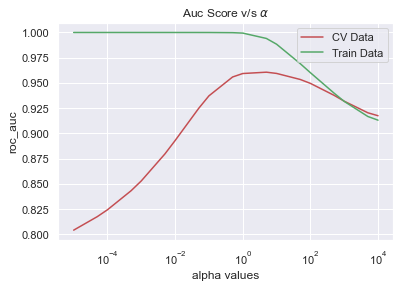

****************************************************************************************************


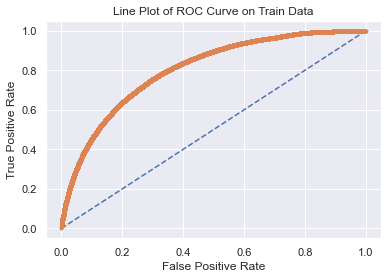

****************************************************************************************************


In [40]:
best_alpha_idf = Multinomial_NB(X_tr,X_cv,Y_tr,Y_cv)

AUC Score 0.945021318717761
**********************************************************************


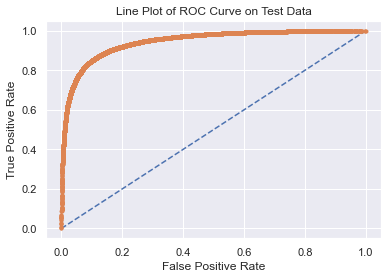

macro f1 score for data : 0.7522201093214484
micro f1 score for data: 0.8217628997229086
hamming loss for data: 0.1782371002770913
**********************************************************************
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.47      0.93      0.62     18834
           1       0.98      0.80      0.88    101343

    accuracy                           0.82    120177
   macro avg       0.73      0.87      0.75    120177
weighted avg       0.90      0.82      0.84    120177

**********************************************************************


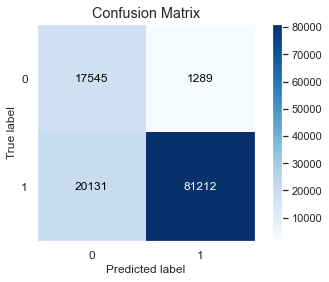

In [41]:
NB_tfidf, roc_auc_idf = Testing_model(X_tr,Y_tr,X_test,Y_test,best_alpha_idf)

In [42]:
# Top features using NB and tfidf

Important_features(TfIdf, NB_tfidf)

,Pos_Words,Pos_Importance,Neg_Words,Neg_Importance
0,great,-9.220026,like,-8.882233
1,like,-9.268520,taste,-9.144116
2,good,-9.346198,would,-9.201194
3,love,-9.386103,product,-9.201773
4,coffee,-9.576623,coffee,-9.450484
...,...,...,...,...
3474704,prejudge coffee,-15.110661,phony chemically,-15.116179
3474705,going pouring,-15.110661,phony cappuccinos,-15.116179
3474706,going powdered,-15.110661,phony butter,-15.116179
3474707,going practices,-15.110661,phony baloney,-15.116179


# Conclusion

In [43]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperameter(alpha)","Test Auc Score"]

####################################################################################
x.add_row(["BoW","MultinomialNB",best_alpha_bow, roc_auc_bow])
x.add_row(["Tf-Idf","MultinomialNB",best_alpha_idf, roc_auc_idf])

####################################################################################
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
####################################################################################
printmd('****Final Conclusion for MultiNomialNB Model:****')
print(x)

****Final Conclusion for MultiNomialNB Model:****

+------------+---------------+--------------------+--------------------+
| Vectorizer |     Model     | Hyperameter(alpha) |   Test Auc Score   |
+------------+---------------+--------------------+--------------------+
|    BoW     | MultinomialNB |        0.5         | 0.8831483877168367 |
|   Tf-Idf   | MultinomialNB |         5          | 0.945021318717761  |
+------------+---------------+--------------------+--------------------+


# Individual prediction

In [44]:
review = """Great, healthier alternative to the usual bhujia we Indians are used to having along with our tea or our beer.
            Much less salt than traditional tea snacks as well. I love the variety of texture as well with the very 
            crunchy peas to soft cheese bits, the sesame seed coated snack to good old roasted peanuts. It is pretty 
            expensive though, at 600rs at a kilo perhaps the most expensive tea snack Ive ever had."""

print("Prediction using BOW:", Individual_Prediction(BOW, NB_bow, review))
print("Prediction using TF-Idf:", Individual_Prediction(TfIdf, NB_tfidf, review))

Prediction using BOW: positive review
Prediction using TF-Idf: positive review
